**Aviation Data Project Phase 1**

We can analyze make/model by total injuries
We start by cleaning up the column names
look at the shape, info, and .describe()
look for missing values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read in your CSV File
df = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory=False)

In [9]:
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [10]:
df.tail()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [13]:
# Convert event_date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

In [14]:
# Clean column names, replacing . to _ and making them lowercase
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      88889 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88837 non-null  object        
 5   country                 88663 non-null  object        
 6   latitude                34382 non-null  object        
 7   longitude               34373 non-null  object        
 8   airport_code            50249 non-null  object        
 9   airport_name            52790 non-null  object        
 10  injury_severity         87889 non-null  object        
 11  aircraft_damage         85695 non-null  object        
 12  aircraft_category       32287 non-null  object

In [19]:
# Split location column into city and state columns
df[['city', 'state']] = df['location'].str.split(', ', n=1, expand=True)

In [21]:
# Clean city column to make everything but the first letter lowercase
df['city'] = df['city'].str.title()

In [22]:
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,city,state
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,Bridgeport,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,Saltville,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,Eureka,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,Canton,OH


In [23]:
# Remove all data with an event_date before 2001-11
df = df[df['event_date'] >= '2001-11']

In [31]:
df.drop(['location', 'publication_date', 'longitude', 'latitude'], axis=1, inplace=True)

In [32]:
df = df[df['country'] == 'United States']

In [37]:
# Define a function to clean the injury_severity column
def clean_column(column):
    column = column.str.replace(r'\(\d\)', '')
    return column

# Apply the function to all relevant columns
df['injury_severity'] = clean_column(df['injury_severity'])

In [52]:
df.state.value_counts()

CA                  3116
TX                  2493
FL                  2388
AK                  2073
AZ                  1305
                    ... 
San Juan Is., WA       1
LA,                    1
CO, CO                 1
MG, OF                 1
CB                     1
Name: state, Length: 67, dtype: int64

In [41]:
#creating a dictionary of states and their corresponding regions
state_region_dict = {'CT': 'North East', 'DE': 'North East', 'ME': 'North East', 'MD': 'North East', 'MA': 'North East', 'NH': 'North East',
                     'NJ': 'North East', 'NY': 'North East', 'PA': 'North East', 'RI': 'North East', 'VT': 'North East',
                     'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MI': 'Midwest', 'MN': 'Midwest',
                     'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',
                     'AL': 'South', 'AR': 'South', 'FL': 'South', 'GA': 'South', 'KY': 'South', 'LA': 'South', 'MS': 'South',
                     'NC': 'South', 'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South',
                     'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'WY': 'West'}

# Add a new column 'region' to the dataframe and map the state to its corresponding region
df['region'] = df['state'].map(state_region_dict)

In [53]:
# Get all unique states in the dataframe
all_states = set(df['state'].unique())

# Get all states in the state_region_dict
region_states = set(state_region_dict.keys())

# Get the difference between the two sets to find states not in the state_region_dict
states_not_in_dict = all_states - region_states

# Print the states not in the state_region_dict
states_not_in_dict

{'AO',
 'CB',
 'CO, CO',
 'DC',
 'GM',
 'GU',
 'LA,',
 'MG, OF',
 'Maui, HI',
 'NYC, NY',
 None,
 'OF',
 'Oahu, HI',
 'PO',
 'PR',
 'San Juan Is., WA',
 'UN',
 'VI',
 nan}

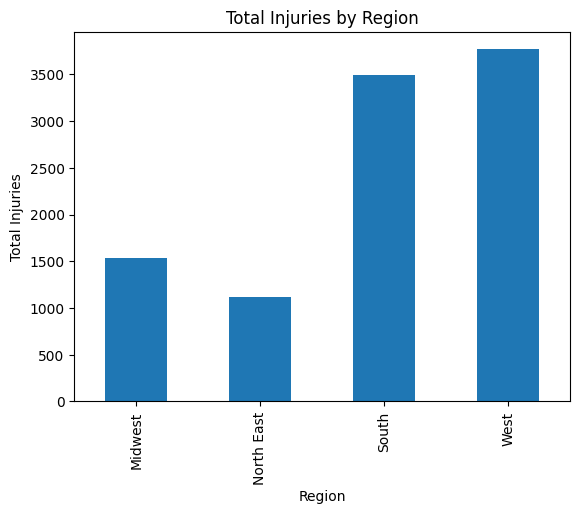

In [56]:
# Group the dataframe by region and sum the total injuries
injuries_by_region = df.groupby('region')['total_fatal_injuries'].sum()

# Create a bar chart of total injuries by region
injuries_by_region.plot(kind='bar')
plt.title('Total Injuries by Region')
plt.xlabel('Region')
plt.ylabel('Total Injuries')
plt.show()

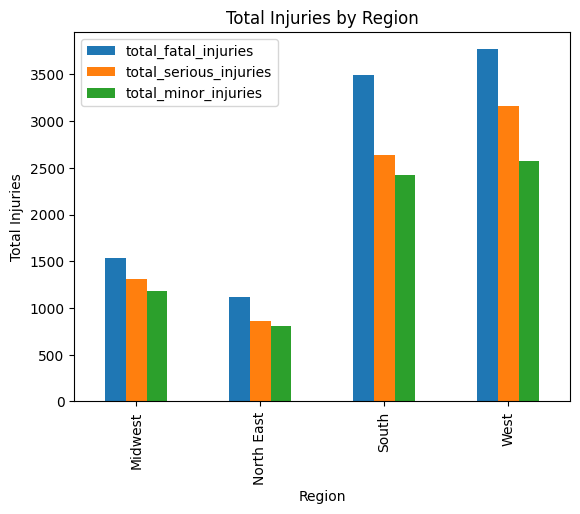

In [54]:
# Group the dataframe by region and sum the total injuries
injuries_by_region = df.groupby('region')[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries']].sum()

# Create a bar chart of total injuries by region
injuries_by_region.plot(kind='bar')
plt.title('Total Injuries by Region')
plt.xlabel('Region')
plt.ylabel('Total Injuries')
plt.show()

**For Weather Conditions**
VMC: pilots have sufficient visibility to fly the aircraft maintaining visual separation from terrain and other aircraft
IMC:  require pilots to fly primarily by reference to instruments, do not have sufficient visibility
Unk: **I think Unk and UNK are the same thing both referreing to ceiling and visibility are unknown
UNK: